# Expectation Maximization - Rainier Robles & Valentin Wolf

# Aufgabe 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy import pi, sin, cos

In [3]:
num_points = 1000
radius = 1

arcs = np.linspace(0, 2 * pi, num_points)
x = radius * sin(arcs)
y = radius * cos(arcs)

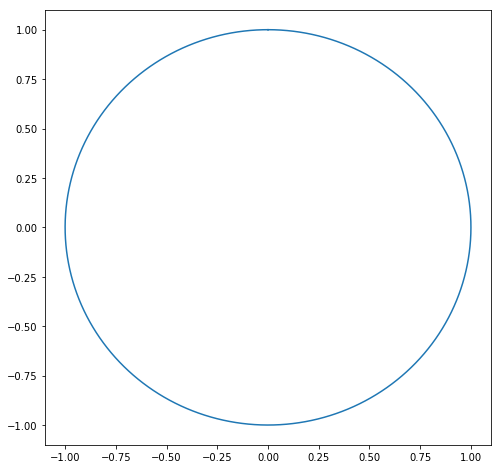

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(x, y)

Um die Kovarianzmatrix als Ellipse darzustellen, kann man die einzelnen Punkte mit der Kovarianzmatrix transformieren. Dafür speichern wir die Bildpunkte in eine Matrix xy.

In [5]:
cov = np.array([
    [1,0 ],
    [0,1]
])

In [6]:
xy = np.array(list(zip(x, y)))
x, y = zip(*xy.dot(cov))

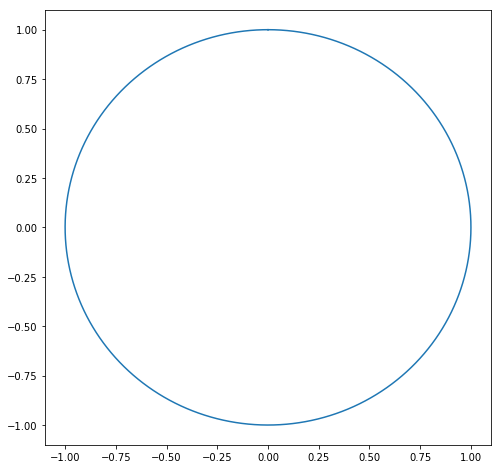

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(x, y)

In [8]:
X = pd.read_csv("2d-em.csv", header=None).as_matrix()

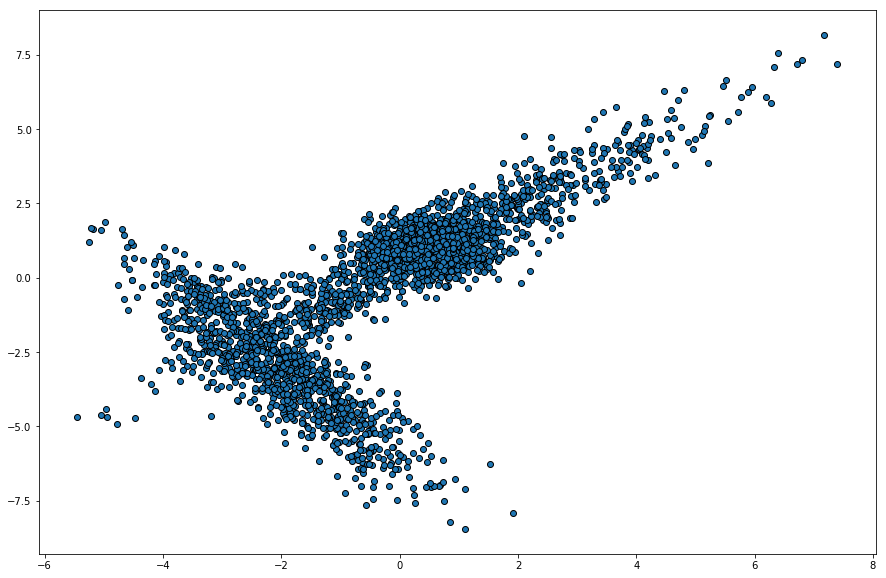

In [9]:
x, y = zip(*X)
plt.figure(figsize=(15, 10))
plt.scatter(x, y, edgecolors="black")

In [10]:
def K_means():
    pass

def mahalanobis_dist(x,y):
    yy = y.reshape(i,j*k).T
    xx = x.reshape(i,j*k).T
    delta = xx - yy
    return np.sqrt(np.einsum('nj,jk,nk->n', delta, VI, delta))

In [11]:
def oval(cov, numpoints=100,radius=1):
    arcs = np.linspace(0, 2 * pi, num_points)
    x = radius * sin(arcs)
    y = radius * cos(arcs)
    
    xy = np.array(list(zip(x, y)))
    x, y = zip(*xy.dot(cov))
    return x,y

def make_plot(a):
    plt.figure(figsize=(15, 10))

    colors = ['g', 'r', 'c', 'm', 'y', 'b' ]
    for i in range(a.cluster_centers.shape[0]):
        # selcect elements based on expectation
        x, y = zip(*X[a.exp == i])

        plt.scatter(x, y, edgecolors="black",color=colors[i])

        # plot centers
        plt.scatter(a.cluster_centers[i,0],a.cluster_centers[i,1],s=500,color=colors[i],cl)

        # plot ovals that show the shape of the  variances
        x, y = oval(a.cluster_covs[i],radius=2)
        x += a.cluster_centers[i,0]
        y += a.cluster_centers[i,1]
        plt.plot(x, y,linewidth=5,color=colors[i])

In [12]:
from numpy.linalg import pinv
import time

class ExpectationMaximization:
    def __init__(self,data,cluster_quantitiy=2):
        
        self.data = data
        datapoints = self.data.shape[0]
        dims = self.data.shape[1]
        
        #initialize with random points and ident. matrices
        rand = np.random.choice(datapoints, cluster_quantitiy,replace=False)
        self.cluster_centers = self.data[rand]
        self.cluster_covs = np.stack([np.eye(dims)]*cluster_quantitiy,axis=0)
        self._stacked_data = np.stack([data]*cluster_quantitiy,axis=1)
        self._Ds = np.zeros((self.cluster_centers.shape[0],self.data.shape[0]))
        self._expect()
        self.it = 0

        
    def fit(self,iterations=10,normalize=False,printfreq=1):
        tic = time.time()
        for i in range(iterations):  
            # Maximization
            self._max(normalize)
            # Expectation
            self._expect()
            self.it += 1
            if i % printfreq == 0:
                print("Completed Iteration", self.it, "Time:", round(time.time()-tic,4))
                tic = time.time()
             
        return self.cluster_centers, self.cluster_covs
    
    def _expect(self):
        centered = np.subtract(self._stacked_data,self.cluster_centers).swapaxes(0,1)
        for i in range(self.cluster_centers.shape[0]):
                a = np.einsum('ij,jk->ik', centered[i], pinv(self.cluster_covs[i]))
                self._Ds[i,] = np.einsum('ij,ij->i',a, centered[i])
        self.exp = np.argmin(self._Ds,axis=0)

    
    def _max(self,normalize):
        X = self.data
        for i in range(self.cluster_centers.shape[0]):
            near = X[self.exp==i]
            if near.shape[0] > 1:    
                self.cluster_centers[i] = near.mean(axis=0)
                self.cluster_covs[i] = np.cov((near-near.mean(axis=0)).T,bias = True)
                if normalize:
                    self.cluster_covs[i] = self.cluster_covs[i] / np.linalg.norm(self.cluster_covs[i])
            else:
                self.cluster_centers[i] = X[np.random.choice(X.shape[0], 1,replace=True)]
                self.cluster_covs[i] = np.eye(X.shape[1])
                
    def predict(self):
        pred = self.data
        for i in range(self.cluster_centers.shape[0]):
            pred[self.exp==i] = self.cluster_centers[i]
        return pred
            

Completed Iteration 1 Time: 0.0011
Completed Iteration 2 Time: 0.0011
Completed Iteration 3 Time: 0.001
Completed Iteration 4 Time: 0.0011
Completed Iteration 5 Time: 0.001
Completed Iteration 6 Time: 0.0013


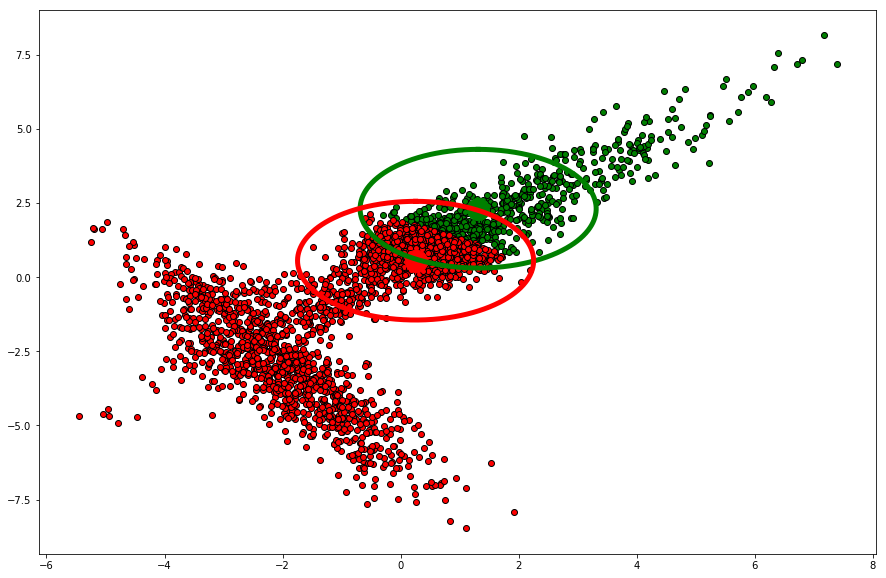

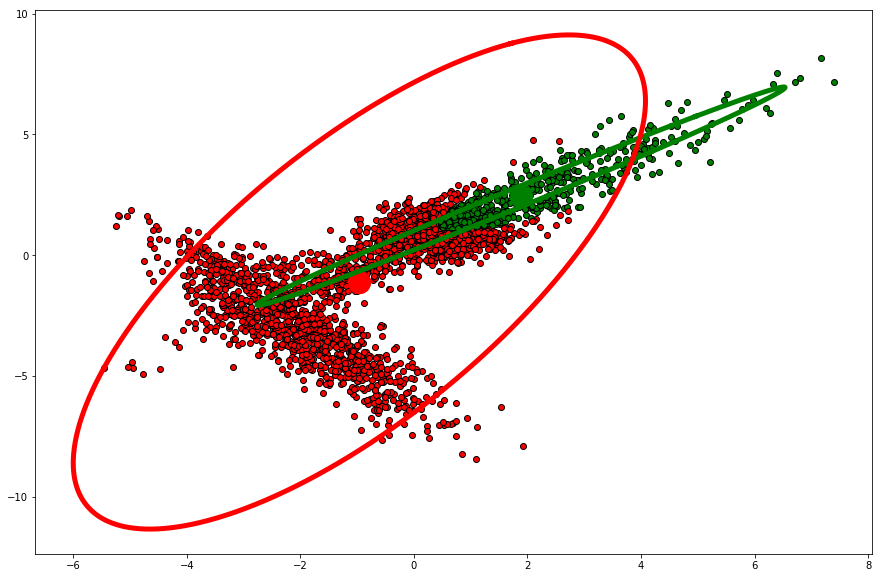

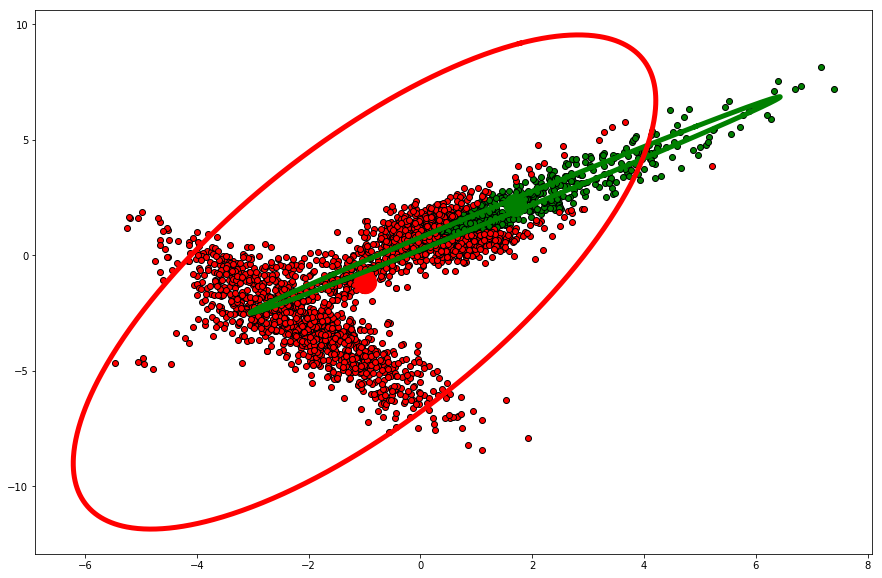

In [13]:
a = ExpectationMaximization(X,2)
for i in range(3):
    make_plot(a)
    #print(a.cluster_covs)
    mm = a.fit(2)

Completed Iteration 1 Time: 0.0014
Completed Iteration 2 Time: 0.0013
Completed Iteration 3 Time: 0.0015
Completed Iteration 4 Time: 0.0014
Completed Iteration 5 Time: 0.0013
Completed Iteration 6 Time: 0.0016
Completed Iteration 7 Time: 0.0012
Completed Iteration 8 Time: 0.0016
Completed Iteration 9 Time: 0.0015


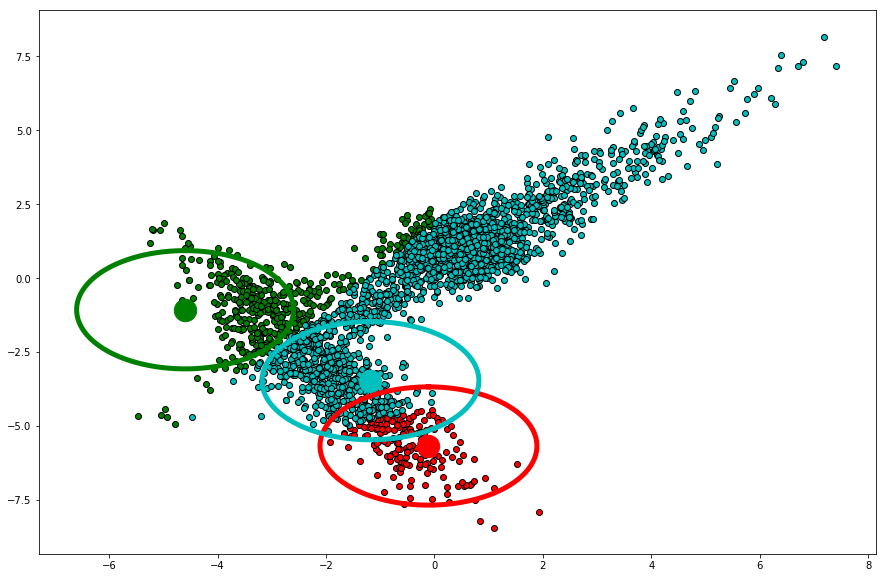

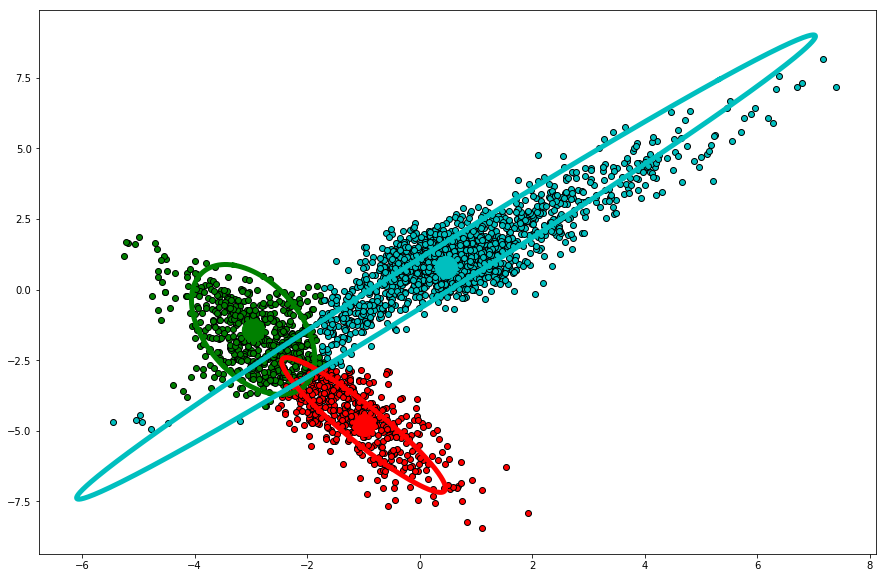

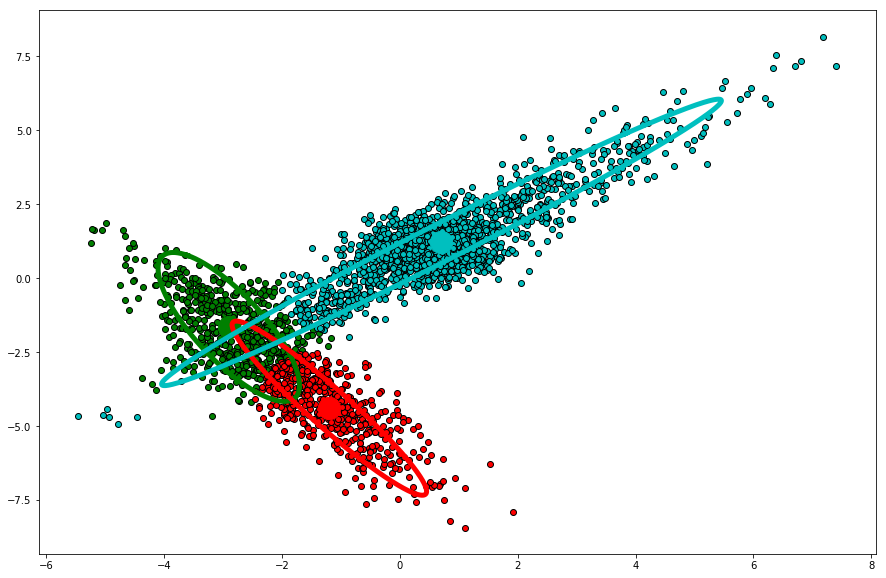

In [14]:
a = ExpectationMaximization(X,3)
for i in range(3):
    make_plot(a)
    a.fit(3,normalize=False)

In [15]:
a.cluster_covs

array([[[ 0.48588481, -0.34917909],
        [-0.34917909,  1.22276721]],

       [[ 0.54563936, -0.6163203 ],
        [-0.6163203 ,  1.34887595]],

       [[ 1.78217738,  1.56540172],
        [ 1.56540172,  1.84054273]]])

Completed Iteration 1 Time: 0.0021
Completed Iteration 5 Time: 0.0082
Completed Iteration 6 Time: 0.0021
Completed Iteration 10 Time: 0.0081
Completed Iteration 11 Time: 0.0022
Completed Iteration 15 Time: 0.0078


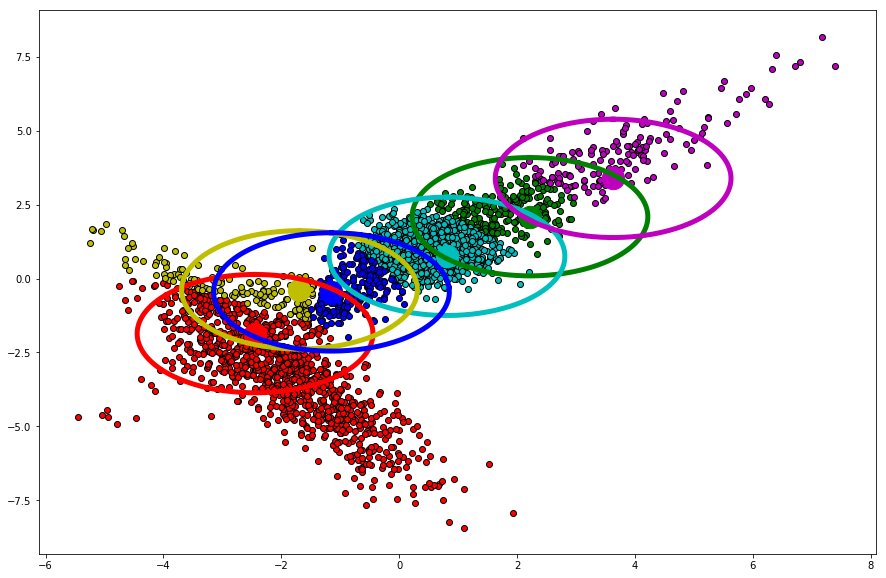

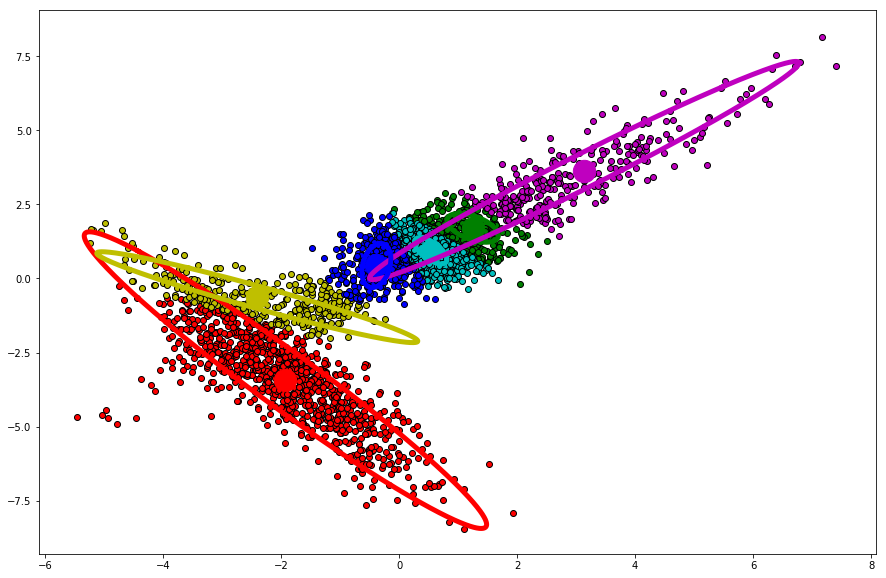

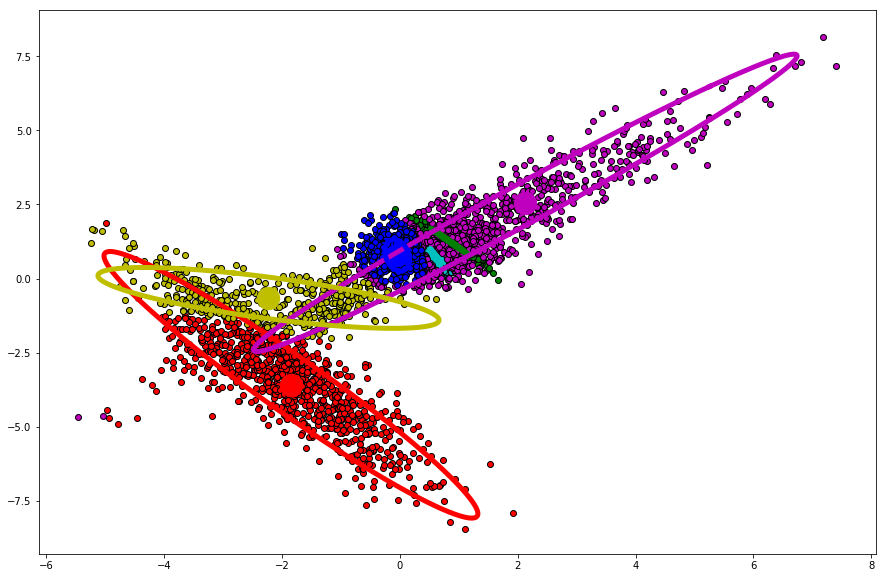

In [16]:
a = ExpectationMaximization(X,6)
for i in range(3):
    make_plot(a)
    a.fit(5, printfreq=4)

In [17]:
a.cluster_covs

array([[[ 0.008085  , -0.00873063],
        [-0.00873063,  0.00957553]],

       [[ 0.91138681, -1.01190214],
        [-1.01190214,  1.76372768]],

       [[ 0.534356  ,  0.12055361],
        [ 0.12055361,  1.35584822]],

       [[ 1.53122691,  1.35661266],
        [ 1.35661266,  1.61792645]],

       [[ 0.41203451, -0.05199371],
        [-0.05199371,  0.19500886]],

       [[ 0.02637854, -0.01372549],
        [-0.01372549,  0.06276795]]])

## Aufgabe 2

Um die Pixel eines Bildes zu importieren, kann man in Python beispielsweise `mpimg` von `matplotlib` benutzen. Das Ergebnis ist eine Matrix mit den einzelnen Bildpunkten.

In [18]:
import matplotlib.image as mpimg

In [19]:
path = '/Users/valentinwolf/Desktop/2Blid.jpg'

 Anschließend kann das Bild wie folgt angezeigt werden:

In [20]:
def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

In [21]:
img = mpimg.imread(path)

Zum Clustering ist es hilfreich diese Matrix noch in einen passenden Shape umzuwandeln:

In [22]:
rows = img.shape[0]
cols = img.shape[1]

img = img.reshape(img.shape[0] * img.shape[1], 3).astype(np.float)
img.shape

(268800, 3)

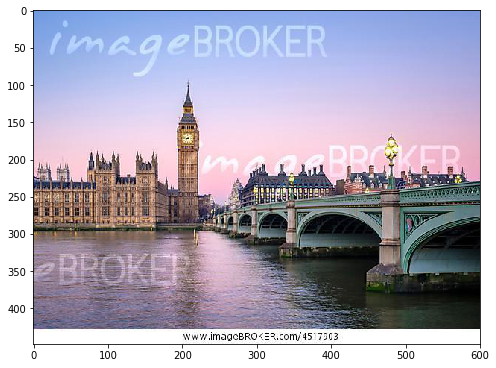

In [23]:
show_img(img.astype('uint8').reshape(rows,cols, 3))

Anschließend kann der Datensatz direkt zum Clustering benutzt werden. Zum Visualisieren muss der ursprüngliche Shape verwendet werden.

In [24]:
img = mpimg.imread(path)
rows = img.shape[0]
cols = img.shape[1]

img = img.reshape(img.shape[0] * img.shape[1], 3).astype(np.float)
cmpr = ExpectationMaximization(img,64)

In [25]:
a = cmpr.fit(10,normalize=True)

Completed Iteration 1 Time: 1.9415
Completed Iteration 2 Time: 2.0119
Completed Iteration 3 Time: 1.9351
Completed Iteration 4 Time: 2.0082
Completed Iteration 5 Time: 1.9557
Completed Iteration 6 Time: 2.0634
Completed Iteration 7 Time: 1.9729
Completed Iteration 8 Time: 1.9461
Completed Iteration 9 Time: 1.9677
Completed Iteration 10 Time: 2.0123


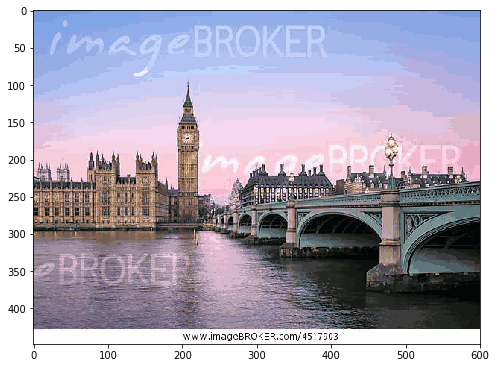

In [26]:
cmpr_img = (cmpr.predict()).astype('uint8').reshape(rows,cols, 3)
show_img(cmpr_img)